In [1]:
#Imports
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation

#roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot



In [2]:
#Using GPU
lr_init = 1.e-3
batch_size = 64
epochs = 20
doGPU=False
start = 0
stop = 16000

In [3]:
#Defining a function to load data

img_rows, img_cols, nb_channels = 32, 32, 2
input_dir = "C:/Users/hp/Downloads"
decays = ['SinglePhotonPt50_IMGCROPS_n249k_RHv1', "SingleElectronPt50_IMGCROPS_n249k_RHv1"]
def load_data(decays, start, stop):
    global input_dir
    dsets = [h5py.File('%s/%s.hdf5'%(input_dir,decay)) for decay in decays]
    # print(dsets)
    X = np.concatenate([dset['/X'][start:stop] for dset in dsets])
    y = np.concatenate([dset['/y'][start:stop] for dset in dsets])
    assert len(X)==len(y)
    return X,y

In [4]:
#Loading data and splitting into training validation and testing sets

X,y = load_data(decays, start, stop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=2)


In [5]:
#Number of training and testing samples:
print("Total number of images in the dataset: ", len(X))
print("Number of Training images: ", len(X_train))
print("Number of Validation images: ", len(X_val))
print("Number of Testing images: ", len(X_test))

Total number of images in the dataset:  32000
Number of Training images:  20480
Number of Validation images:  5120
Number of Testing images:  6400


<function matplotlib.pyplot.show(close=None, block=None)>

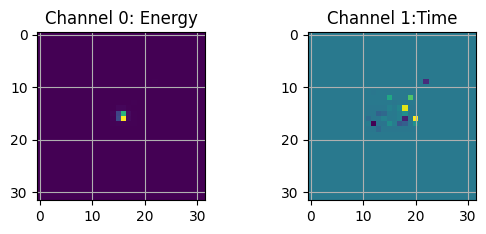

In [6]:
# A sample image from the dataset
plt.figure(1)

plt.subplot(221)
plt.imshow(X_train[1,:,:,0])
plt.title("Channel 0: Energy")
plt.grid(True)

plt.subplot(222)
plt.imshow(X_train[1,:,:,1])
plt.title("Channel 1:Time")
plt.grid(True)

plt.show

In [7]:
#Defining the model
model= models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [14]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1.e-3),
    metrics=['accuracy', tf.keras.metrics.AUC(curve='ROC')]
)

In [15]:
#Fitting the model
history= model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),verbose=2)

Epoch 1/10


640/640 - 27s - loss: 0.6781 - accuracy: 0.5664 - auc_1: 0.5938 - val_loss: 0.6654 - val_accuracy: 0.5990 - val_auc_1: 0.6296 - 27s/epoch - 42ms/step
Epoch 2/10
640/640 - 22s - loss: 0.6540 - accuracy: 0.6125 - auc_1: 0.6493 - val_loss: 0.6597 - val_accuracy: 0.6018 - val_auc_1: 0.6398 - 22s/epoch - 35ms/step
Epoch 3/10
640/640 - 21s - loss: 0.6452 - accuracy: 0.6288 - auc_1: 0.6665 - val_loss: 0.6605 - val_accuracy: 0.6076 - val_auc_1: 0.6467 - 21s/epoch - 33ms/step
Epoch 4/10
640/640 - 22s - loss: 0.6361 - accuracy: 0.6425 - auc_1: 0.6850 - val_loss: 0.6423 - val_accuracy: 0.6301 - val_auc_1: 0.6703 - 22s/epoch - 34ms/step
Epoch 5/10
640/640 - 22s - loss: 0.6199 - accuracy: 0.6662 - auc_1: 0.7095 - val_loss: 0.6354 - val_accuracy: 0.6469 - val_auc_1: 0.6887 - 22s/epoch - 34ms/step
Epoch 6/10
640/640 - 23s - loss: 0.6093 - accuracy: 0.6737 - auc_1: 0.7245 - val_loss: 0.6308 - val_accuracy: 0.6465 - val_auc_1: 0.6925 - 23s/epoch - 36ms/step
Epoch 7/10
640/640 - 21s - loss:

In [16]:
# Saving and loading the model for future use 
model.save_weights('model2.h5')
# model.load_weights('model2.h5')

200/200 [==============================] - 3s 16ms/step


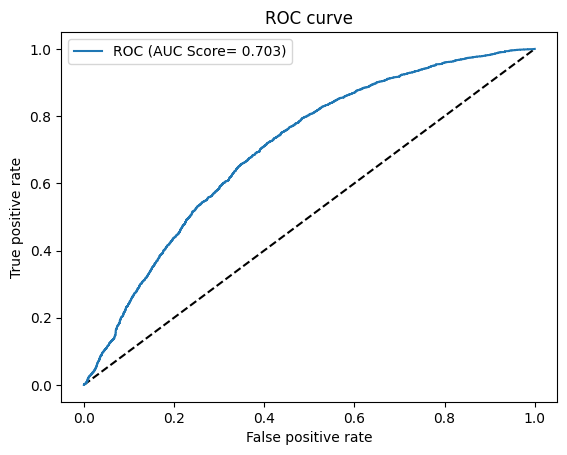

In [17]:
#Plotting the ROC Curve

from sklearn.metrics import roc_curve
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
from sklearn.metrics import auc
auc = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (AUC Score= {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [18]:
acc1= np.equal(y_test,np.round(y_pred)).mean()
print("Test accuracy:", acc1)

Test accuracy: 0.6434375


In [19]:
y_train_pred= model.predict(X_train).ravel()
acc= np.equal(y_train,np.round(y_train_pred)).mean()
print("Training accuracy:", acc)

640/640 [==============================] - 9s 14ms/step
Training accuracy: 0.7228515625
